In [48]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [49]:
file = open("kode_negara_lengkap.json").read()
file_si_json = json.loads(file)
file_si_json
nama_negara = input("Masukkan nama negara: ")
input_nama_negara = nama_negara.capitalize()
cek = next((i for i in file_si_json if i["name"] == input_nama_negara), None)
list_input = list()
for key, val in cek.items():
    if key == "alpha-3":
        list_input.append(val)
print(list_input)

['COL']


     kode_negara  tahun   produksi
1925         COL   1971  11227.193
1926         COL   1972  10233.324
1927         COL   1973   9578.480
1928         COL   1974   8764.213
1929         COL   1975   8087.171
1930         COL   1976   7546.345
1931         COL   1977   7097.338
1932         COL   1978   6748.222
1933         COL   1979   6418.278
1934         COL   1980   6474.782
1935         COL   1981   6961.122
1936         COL   1982   7455.534
1937         COL   1983   7916.649
1938         COL   1984   8715.781
1939         COL   1985   9177.905
1940         COL   1986  15721.299
1941         COL   1987  20208.342
1942         COL   1988  19554.507
1943         COL   1989  21022.609
1944         COL   1990  22819.646
1945         COL   1991  22095.180
1946         COL   1992  22880.186
1947         COL   1993  23621.804
1948         COL   1994  23684.362
1949         COL   1995  30413.413
1950         COL   1996  32602.953
1951         COL   1997  33940.893
1952         COL   1

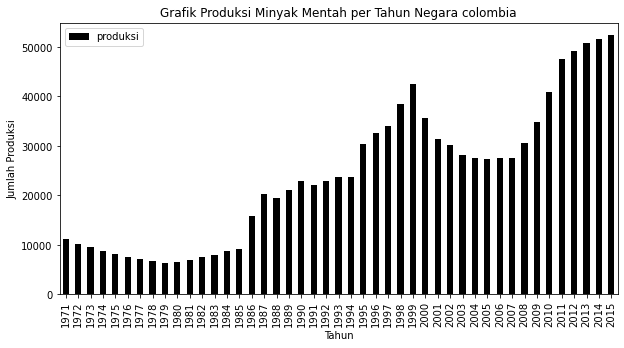

In [50]:
filename = "produksi_minyak_mentah.csv"
df = pd.read_csv(filename)
data_olah =df[(df["kode_negara"] == list_input[0])]
data_olah.plot(x = "tahun", y = "produksi", kind="bar", color = "black", width = 0.5, figsize = (10,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Produksi")
judul = "Grafik Produksi Minyak Mentah per Tahun Negara {}"
plt.title(judul.format(nama_negara))
print(data_olah)

Text(0, 0.5, 'Jumlah Produksi')

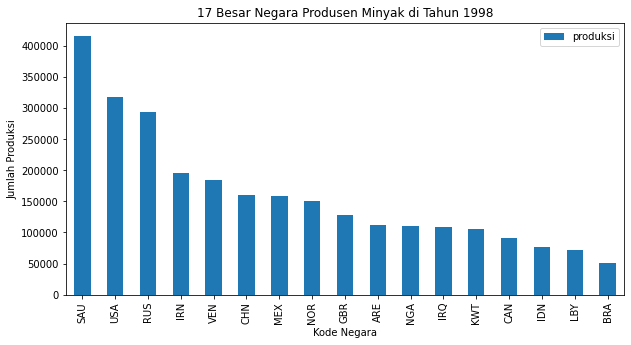

In [51]:
tahun = input("Masukkan tahun: ")
nilai_b = input("Masukkan b besar negara: ")
data_with_index = df.set_index("kode_negara")
data_with_index.head()
data_with_index = data_with_index.drop(["WLD", "G20", "OECD", "OEU", "EU28"])
data_tahun =data_with_index[(data_with_index["tahun"] == int(tahun))]
a = data_tahun.nlargest(int(nilai_b), ["produksi"])
a.plot(y="produksi", kind="bar", figsize = (10,5)) 
title = "{} Besar Negara Produsen Minyak di Tahun {}"
plt.title(title.format(nilai_b, tahun))
plt.xlabel("Kode Negara")
plt.ylabel("Jumlah Produksi")

Text(0, 0.5, 'Total Produksi')

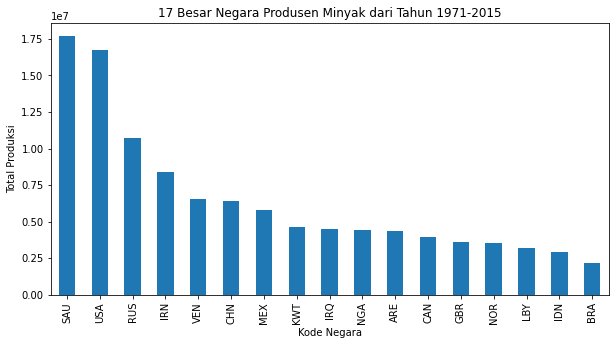

In [52]:
data_negara = data_with_index.groupby("kode_negara")["produksi"].sum()
data_negara.sort_values(ascending=False)
b_besar_negara = data_negara.nlargest(int(nilai_b))
b_besar_negara.plot(kind="bar", figsize = (10,5)) 
title = "{} Besar Negara Produsen Minyak dari Tahun 1971-2015"
plt.title(title.format(nilai_b))
plt.xlabel("Kode Negara")
plt.ylabel("Total Produksi")